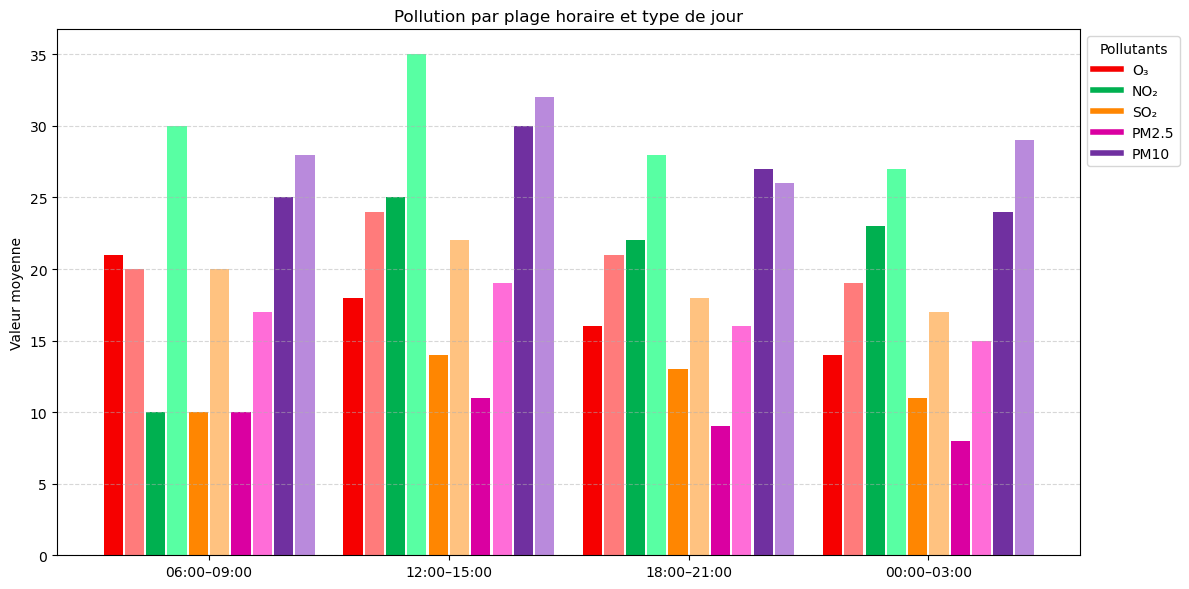

In [69]:
import matplotlib.colors as mcolors
import colorsys
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D  # Importer Line2D pour gérer les handles de légende personnalisés


def lighten_color(color, amount=0.5):
    """
    Lightens the given color by reducing its saturation and increasing its lightness.
    Input can be a matplotlib color string, hex string, or RGB tuple.
    """
    try:
        c = mcolors.cnames[color]
    except KeyError:
        c = color
    rgb = mcolors.to_rgb(c)  # Convert color to RGB (between 0 and 1)
    hls = colorsys.rgb_to_hls(*rgb)  # Convert RGB to HLS
    lighter_rgb = colorsys.hls_to_rgb(hls[0], 1 - amount * (1 - hls[1]), hls[2])  # Lighten the color
    
    # Convert the RGB (0-1) to HEX (0-255)
    r, g, b = [int(c * 255) for c in lighter_rgb]
    
    # Return the color as a hex string
    return '#{:02x}{:02x}{:02x}'.format(r, g, b)

# Exemple d'utilisation
lighter_color_1 = lighten_color('#F60000', 0.5)  # Color lightening
lighter_color_2 = lighten_color('#00B050', 0.5)  # Color lightening
lighter_color_3 = lighten_color('#FF8601', 0.5)  # Color lightening
lighter_color_4 = lighten_color('#DA00A1', 0.5)  # Color lightening
lighter_color_5 = lighten_color('#7030A0', 0.5)  # Color lightening


def plot_pollution_histogram(values, weekend_colors):
    if len(values) != 4 or len(values[0]) != 10:
        raise ValueError("La liste doit contenir 4 sous-listes, chacune avec 10 valeurs (5 pour la semaine et 5 pour le week-end).")

    # Données de base
    plages_horaires = ["06:00–09:00", "12:00–15:00", "18:00–21:00", "00:00–03:00"]
    polluants = ["O₃", "NO₂", "SO₂", "PM2.5", "PM10"]

    # Vérification de la couleur week-end
    if len(weekend_colors) != 5:
        raise ValueError("Tu dois fournir exactement 5 couleurs hex pour les polluants du week-end.")

    # Couleurs fixes pour semaine (tu peux les changer)
    semaine_colors = ['#F60000', '#00B050', '#FF8601', '#DA00A1', '#7030A0']

    # Construction du graphique
    x = np.arange(len(plages_horaires))  # positions des groupes
    bar_width = 0.08
    offset = np.linspace(-0.4, 0.4, 10)  # 10 barres par groupe, mieux réparties

    fig, ax = plt.subplots(figsize=(12, 6))

    # Ajouter les barres et les légendes
    for plage_index in range(4):
        for i in range(10):
            # Calculer l'indice du polluant, en fonction de l'ordre souhaité
            if i % 2 == 0:  # Indices impairs : weekday
                polluant_index = i // 2
                valeur = values[plage_index][polluant_index]  # Valeur pour weekday
                color = semaine_colors[polluant_index]
            else:  # Indices pairs : weekend
                polluant_index = (i - 1) // 2
                valeur = values[plage_index][polluant_index + 5]  # Valeur pour weekend
                color = weekend_colors[polluant_index]

            # Positionner la barre selon l'indice et l'offset
            xpos = x[plage_index] + offset[i]

            # Créer la barre pour cette plage horaire et polluant
            ax.bar(xpos, valeur, width=bar_width, color=color)

    # Customisation de l'axe x (plages horaires)
    ax.set_xticks(x)
    ax.set_xticklabels(plages_horaires)

    # Label pour les axes et titre
    ax.set_ylabel("Valeur moyenne")
    ax.set_title("Pollution par plage horaire et type de jour")

    # Ajouter un fond de grille pour l'axe Y
    ax.grid(axis='y', linestyle='--', alpha=0.5)

    # Légende simplifiée avec une seule entrée par polluant pour semaine et week-end
    handles = [Line2D([0], [0], color=semaine_colors[i], lw=4, label=f"{polluants[i]}") for i in range(5)]

    # Placer la légende
    ax.legend(handles=handles, loc='upper left', bbox_to_anchor=(1, 1), fontsize='medium', title = 'Pollutants')

    # Affichage de l'histogramme
    plt.tight_layout()
    plt.show()

# Exemple d'utilisation avec la liste détaillée
values = [
    [21, 10, 10, 10, 25, 20, 30, 20, 17, 28],  # 06:00 à 09:00
    [18, 25, 14, 11, 30, 24, 35, 22, 19, 32],  # 12:00 à 15:00
    [16, 22, 13, 9, 27, 21, 28, 18, 16, 26],   # 18:00 à 21:00
    [14, 23, 11, 8, 24, 19, 27, 17, 15, 29]    # 00:00 à 03:00
]

weekend_colors = [lighter_color_1, lighter_color_2, lighter_color_3, lighter_color_4, lighter_color_5]  # couleurs personnalisées pour le week-end

plot_pollution_histogram(values, weekend_colors)




In [ ]:
values_ordre = ['O3', 'NO2', 'SO2', 'PM25', 'PM10', #6h00-9h00 weekday
                    'O3', 'NO2', 'SO2', 'PM25', 'PM10', #6h00-9h00 weekend
                    'O3', 'NO2', 'SO2', 'PM25', 'PM10', #12-15h weekday
                    'O3', 'NO2', 'SO2', 'PM25', 'PM10', #12h-15h weekend
                    'O3', 'NO2', 'SO2', 'PM25', 'PM10', #18-21h weekday
                    'O3', 'NO2', 'SO2', 'PM25', 'PM10', #18h-21h weekend
                    'O3', 'NO2', 'SO2', 'PM25', 'PM10', #00-03h weekday
                    'O3', 'NO2', 'SO2', 'PM25', 'PM10' #OO-03h weekend
                   ]

values_ete_MAG = [39.11, 'NO2', 'SO2', 'PM25', 'PM10', #6h00-9h00 weekday
                    46.69, 'NO2', 'SO2', 'PM25', 'PM10', #6h00-9h00 weekend
                    97.67, 'NO2', 'SO2', 'PM25', 'PM10', #12-15h weekday
                    96.65, 'NO2', 'SO2', 'PM25', 'PM10', #12h-15h weekend
                    81.49, 'NO2', 'SO2', 'PM25', 'PM10', #18-21h weekday
                    77.34, 'NO2', 'SO2', 'PM25', 'PM10', #18h-21h weekend
                    36.71, 'NO2', 'SO2', 'PM25', 'PM10', #00-03h weekday
                    43.11, 'NO2', 'SO2', 'PM25', 'PM10' #OO-03h weekend
                   ]

values_hiver_MAG = [17.14, 'NO2', 'SO2', 'PM25', 'PM10', #6h00-9h00 weekday
                    25.38, 'NO2', 'SO2', 'PM25', 'PM10', #6h00-9h00 weekend
                    51.89, 'NO2', 'SO2', 'PM25', 'PM10', #12-15h weekday
                    57.53, 'NO2', 'SO2', 'PM25', 'PM10', #12h-15h weekend
                    28.45, 'NO2', 'SO2', 'PM25', 'PM10', #18-21h weekday
                    32.62, 'NO2', 'SO2', 'PM25', 'PM10', #18h-21h weekend
                    20.26, 'NO2', 'SO2', 'PM25', 'PM10', #00-03h weekday
                    29.01, 'NO2', 'SO2', 'PM25', 'PM10' #OO-03h weekend
                   ]





values_ete_CHA = ['O3', 'NO2', 'SO2', 'PM25', 'PM10', #6h00-9h00 weekday
                    'O3' 'NO2', 'SO2', 'PM25', 'PM10', #6h00-9h00 weekend
                    'O3' 'NO2', 'SO2', 'PM25', 'PM10', #12-15h weekday
                    'O3' 'NO2', 'SO2', 'PM25', 'PM10', #12h-15h weekend
                    'O3' 'NO2', 'SO2', 'PM25', 'PM10', #18-21h weekday
                    'O3' 'NO2', 'SO2', 'PM25', 'PM10', #18h-21h weekend
                    'O3' 'NO2', 'SO2', 'PM25', 'PM10', #00-03h weekday
                    'O3' 'NO2', 'SO2', 'PM25', 'PM10' #OO-03h weekend
                   ]

values_hiver_CHA = ['O3', 'NO2', 'SO2', 'PM25', 'PM10', #6h00-9h00 weekday
                    'O3' 'NO2', 'SO2', 'PM25', 'PM10', #6h00-9h00 weekend
                    'O3' 'NO2', 'SO2', 'PM25', 'PM10', #12-15h weekday
                    'O3' 'NO2', 'SO2', 'PM25', 'PM10', #12h-15h weekend
                    'O3' 'NO2', 'SO2', 'PM25', 'PM10', #18-21h weekday
                    'O3' 'NO2', 'SO2', 'PM25', 'PM10', #18h-21h weekend
                    'O3' 'NO2', 'SO2', 'PM25', 'PM10', #00-03h weekday
                    'O3' 'NO2', 'SO2', 'PM25', 'PM10' #OO-03h weekend
                   ]